<a href="https://colab.research.google.com/github/windyday0622/windyday/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%20m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 머신러닝
- 평가일 : 24. 8. 5
- 성명 : 신현진
- 점수 :

Q1. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 결정트리를 시각화


Accuracy: 0.9473684210526315


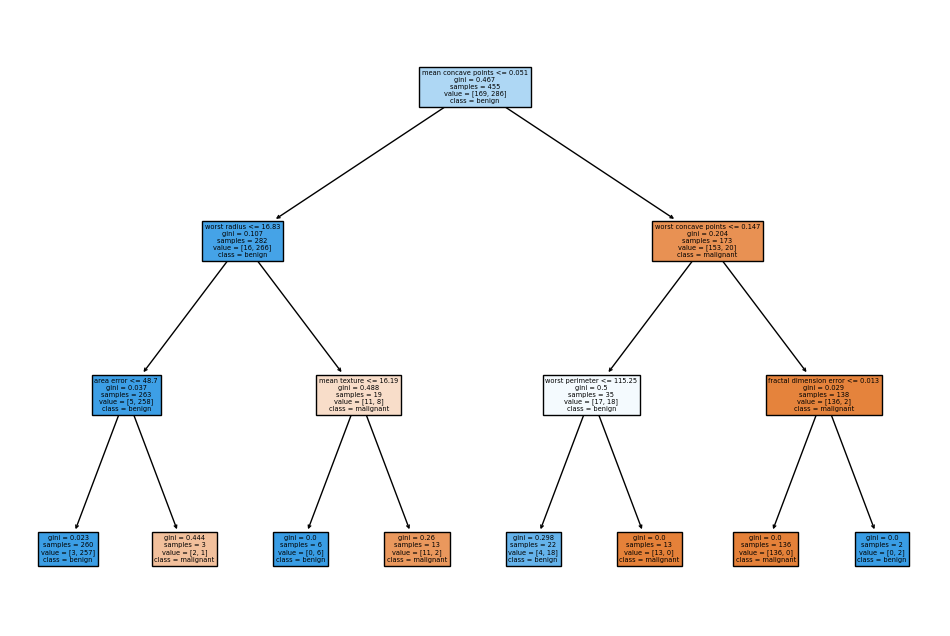

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 데이터셋 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분류 모델 생성
dt = DecisionTreeClassifier(criterion='gini', max_depth=3)

# 모델 학습
dt.fit(X_train, y_train)

# 모델 예측
y_pred = dt.predict(X_test)

# 모델 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 결정 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

Q2. 와인 데이터에 대해서 아래 사항을 고려하여 모델 생성 및 성능개선을 위한 하이퍼파라미터 튜닝을 수행한 후 테스트 데이터로 평가하세요.
- dt를 알고리즘으로 적용
- cv = 5
- param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 와인 데이터셋 로드
wine = load_wine()
X = wine.data
y = wine.target

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정나무 분류기를 생성
dt = DecisionTreeClassifier()

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드를 정의
param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

# 최적의 하이퍼파라미터를 찾기 위해 그리드 탐색 교차 검증을 수행
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
best_params = grid_search.best_params_

# 최적의 하이퍼파라미터로 새로운 의사결정나무 분류기를 생성
dt_best = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])

# 최적의 하이퍼파라미터로 모델을 학습
dt_best.fit(X_train, y_train)

# 테스트 세트에 대해 예측을 수행
y_pred = dt_best.predict(X_test)

# 모델 성능을 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.9444444444444444


Q3. 보스톤 주택가격 데이터셋에 대하여 규제 선형 모델인 릿지, 라쏘, 엘라스틱넷 모델로 교차검증을 수행하고 아래 각 모델의 알파값의 변화에 따른 회귀계수의 변화를 출력하세요. (단, 사용자 함수를 작성하여 수행)
- ridge_alphas = [0, 0.1, 1, 10, 100]
- lasso_alphas = [0.07,0.1,0.5,1,3]
- elastic_alphas = [0.07,0.1,0.5,1,3], L1:L2 = 0.7:0.3

In [36]:
import pandas as pd
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
# 필요한 feature이면 dtype 변환 -  category 타입을 먼저 수치형으로 변환

# 'CHAS'와 'RAD' 열을 원-핫 인코딩하여 범주형 데이터를 수치형으로 변환
boston_df = pd.get_dummies(boston_df, columns=['CHAS', 'RAD'])

# 업데이트된 DataFrame 출력
print(boston_df.head())

      CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   

   ...  CHAS_1  RAD_1  RAD_2  RAD_24  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  
0  ...   False   True  False   False  False  False  False  False  False  False  
1  ...   False  False   True   False  False  False  False  False  False  False  
2  ...   False  False   True   False  False  False  False  False  False  False  
3  ...   False  False  False   False   True  False  False  False  False  False  
4  ...   False  False  False   False   True  False  False  False  False  False  

[5 rows x 23 columns]


In [41]:
# get_linear_reg_eval 사용자 함수
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [46]:
# 합성 회귀 데이터 생성
X_data, y_target = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# 호환성을 위해 X_data를 DataFrame으로 변환
X_data = pd.DataFrame(X_data, columns=[f'feature_{i}' for i in range(X_data.shape[1])])

def get_linear_reg_eval(model_name, params, X_data, y_target):
    # 계수를 저장할 DataFrame 초기화
    coeff_df = pd.DataFrame()
    for param in params:
        # 모델 선택 및 초기화
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)

        # 모델 학습
        model.fit(X_data, y_target)
        # 학습된 모델의 계수를 Series로 변환
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha: ' + str(param)
        # 계수를 DataFrame에 추가
        coeff_df[colname] = coeff

    return coeff_df

In [43]:
# Ridge
ridge_alphas = [0, 0.1, 1, 10, 100]
ridge_coefs = get_linear_reg_eval('Ridge', ridge_alphas, X_data, y_target)
print("Ridge 회귀 계수:")
print(ridge_coefs)

Ridge 회귀 계수:
            alpha: 0  alpha: 0.1   alpha: 1  alpha: 10  alpha: 100
feature_0  60.590007   60.531132  60.006942  55.267820   31.472439
feature_1  98.654329   98.539458  97.517936  88.387367   46.013015
feature_2  64.558912   64.446562  63.451368  54.867561   22.224880
feature_3  57.056963   56.991218  56.407177  51.230862   27.559993
feature_4  35.609476   35.588734  35.402036  33.555561   20.929636


In [44]:
# Lasso
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
lasso_coefs = get_linear_reg_eval('Lasso', lasso_alphas, X_data, y_target)
print("\nLasso 회귀 계수:")
print(lasso_coefs)


Lasso 회귀 계수:
           alpha: 0.07  alpha: 0.1  alpha: 0.5   alpha: 1   alpha: 3
feature_0    60.523721   60.495304   60.116411  59.642795  57.748330
feature_1    98.571240   98.535605   98.060468  97.466547  95.090865
feature_2    64.441769   64.391544   63.721867  62.884772  59.536390
feature_3    56.980449   56.947643   56.510231  55.963466  53.776408
feature_4    35.554432   35.530845   35.216351  34.823233  33.250760


In [45]:
# Elasticnet
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
elastic_coefs = get_linear_reg_eval('ElasticNet', elastic_alphas, X_data, y_target)
print("\nElasticNet 회귀 계수:")
print(elastic_coefs)


ElasticNet 회귀 계수:
           alpha: 0.07  alpha: 0.1  alpha: 0.5   alpha: 1   alpha: 3
feature_0    59.334424   58.813172   52.683870  46.655380  31.976932
feature_1    96.242071   95.244278   83.683971  72.653507  47.392235
feature_2    62.193428   61.226230   50.497309  41.071685  22.431941
feature_3    55.659341   55.082888   48.462548  42.212598  27.889139
feature_4    35.135916   34.933532   32.313372  29.347105  20.882562


Q4. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화 하세요.

In [48]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_ftrs = iris.data

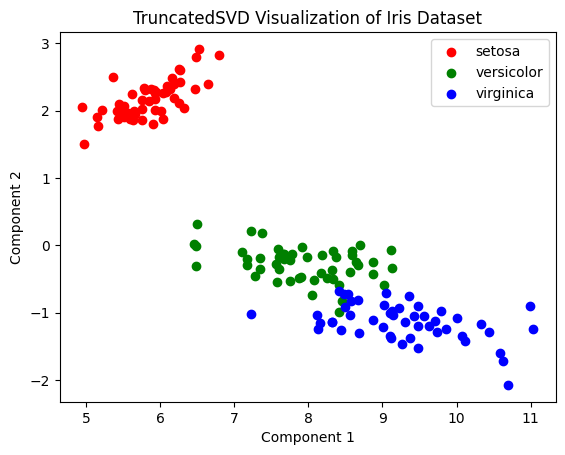

In [52]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

# TruncatedSVD와 n_components=2 적용
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(iris_ftrs)

# DataFrame 생성
df = pd.DataFrame(data=X_svd, columns=['Component 1', 'Component 2'])
df['Target'] = iris.target

colors = ['red', 'green', 'blue']

targets = ['setosa', 'versicolor', 'virginica']
for target, color in zip(targets, colors):
    indices = df['Target'] == iris.target_names.tolist().index(target)
    plt.scatter(df.loc[indices, 'Component 1'], df.loc[indices, 'Component 2'], c=color, label=target)

plt.title('TruncatedSVD Visualization of Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.legend()

plt.show()

Q5. iris 데이터셋의 sepal length,	sepal width,	petal length,	petal width 4개의 독립변수로 군집화를 수행 시 최적의 군집수를 산출하세요. 단, 군집개수별시뮬레이션을 시각화해서 최적의 군집수에 대한 이유도 설명

In [53]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

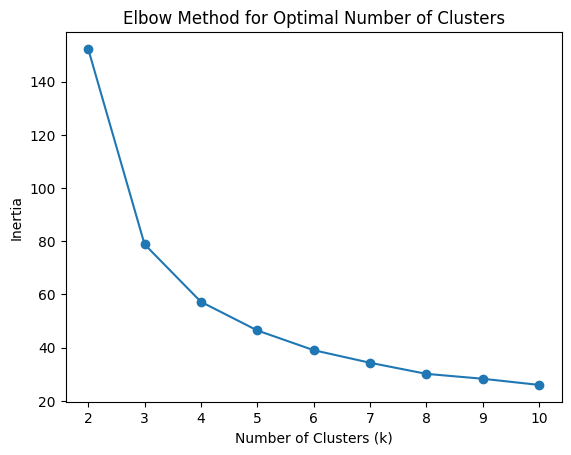

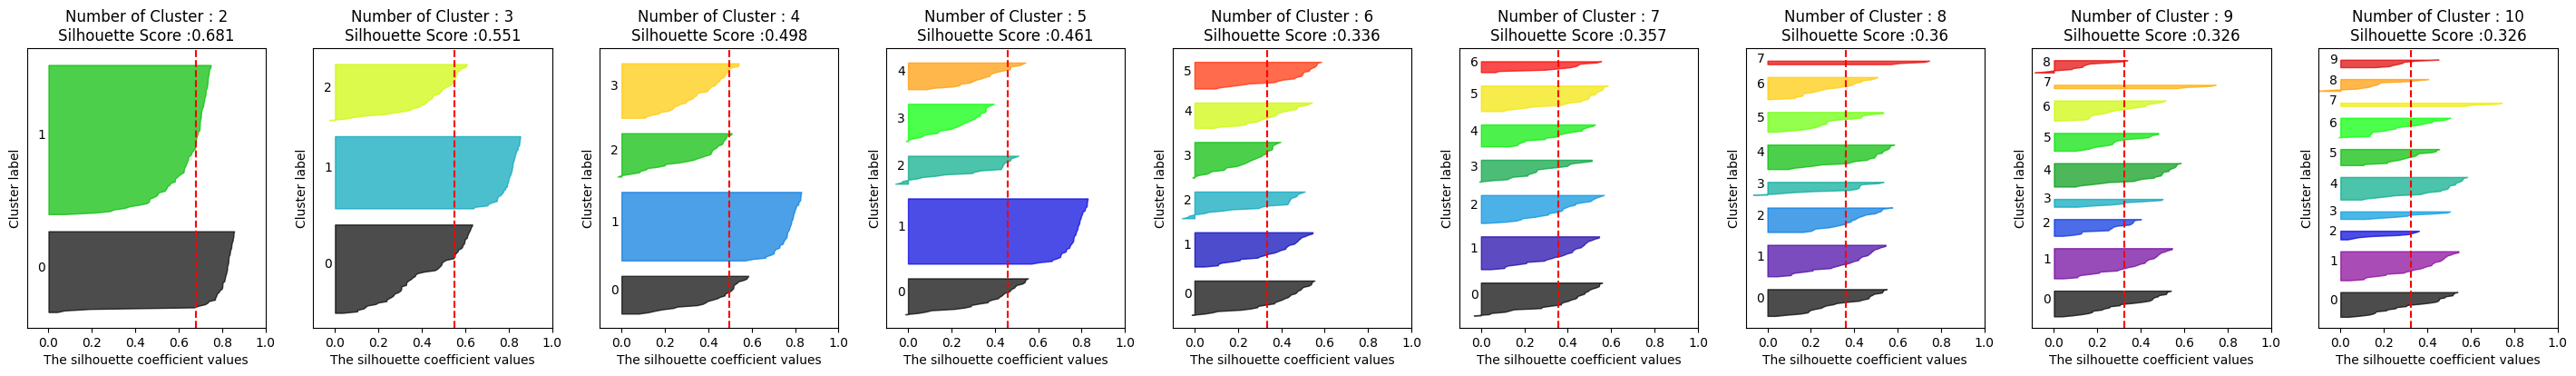

In [54]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터셋 로드
iris = load_iris()
X = iris.data

k_values = range(2, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

cluster_lists = range(2, 11)
visualize_silhouette(cluster_lists, X)

분석


엘보우 방법:

관찰: 관성 그래프에서 k=3에서 명확한 "엘보우"를 확인할 수 있다. 이는 3 이상의 군집 수를 증가시키는 것이 관성 감소에 있어 작은 기여를 한다는 것을 시사한다.


실루엣 분석:

관찰: k=2와 k=3의 실루엣 점수가 비교적 높으며, k=3이 가장 높은 평균 실루엣 점수를 가집니다. 이는 데이터 포인트들이 3개의 군집으로 잘 묶여 있음을 나타낸다.


결론

엘보우 방법과 실루엣 분석 모두를 기반으로 했을 때, Iris 데이터셋의 최적의 군집 수는 3으로 보인다. 이는 Iris 데이터셋의 알려진 구조인 세 가지의 명확한 종(Species)인 Setosa, Versicolor, Virginica와 일치한다. 이는 k=3을 최적의 군집 수로 선택한 것을 더욱 검증한다.

실습과제1. 실습과제 코드를 작성하세요.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 데이터 로드
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 및 하이퍼파라미터 그리드 정의
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    ('Lasso Regression', Lasso(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    ('ElasticNet Regression', ElasticNet(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42), {'regressor__max_depth': [3, 5, 7]}),
    ('Random Forest Regression', RandomForestRegressor(random_state=42), {
        'regressor__n_estimators': [100, 300, 500],
        'regressor__max_depth': [3, 5, 7]
    }),
    ('Gradient Boosting Regression', GradientBoostingRegressor(random_state=42), {
        'regressor__n_estimators': [100, 300, 500],
        'regressor__max_depth': [3, 5, 7]
    }),
    ('Support Vector Regression', SVR(), {
        'regressor__C': [0.1, 1.0, 10.0],
        'regressor__epsilon': [0.01, 0.1, 1.0]
    }),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(), {
        'regressor__n_neighbors': [3, 5, 7]
    })
]

# 결과 저장용 리스트
results = []

# 모델별 그리드 서치 수행
for name, model, param_grid in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # 최적 모델 평가
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'model': name,
        'best_params': grid_search.best_params_,
        'mse': mse
    })

# 결과 출력
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='mse')
print(results_df)

# 최적 모델 평가 결과 출력
best_model_name = results_df.iloc[0]['model']
best_params = results_df.iloc[0]['best_params']
best_mse = results_df.iloc[0]['mse']

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Test MSE: {best_mse:.4f}")

                            model  \
6    Gradient Boosting Regression   
7       Support Vector Regression   
5        Random Forest Regression   
8  K-Nearest Neighbors Regression   
4        Decision Tree Regression   
1                Ridge Regression   
0               Linear Regression   
3           ElasticNet Regression   
2                Lasso Regression   

                                         best_params       mse  
6  {'regressor__max_depth': 5, 'regressor__n_esti...  0.209262  
7  {'regressor__C': 10.0, 'regressor__epsilon': 0.1}  0.323697  
5  {'regressor__max_depth': 7, 'regressor__n_esti...  0.377614  
8                      {'regressor__n_neighbors': 7}  0.428334  
4                        {'regressor__max_depth': 7}  0.456586  
1                          {'regressor__alpha': 0.1}  0.555888  
0                                                 {}  0.555892  
3                          {'regressor__alpha': 0.1}  0.635857  
2                          {'regressor__alph